### Deepak Aruumugam Vivekanandan
### Harmonizing trends with reviews of Spotify VS AppleMusic


In [ ]:
#Importing all the necessary libraries for the Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Mounting the Google Drive to import the dataset.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/"

/content/drive/My Drive


In [ ]:
# Reading the dataset using pandas
df=pd.read_excel("Spotify Vs Apple customer reviews final - Copy.xlsx")
df

,Apps,Country,Date,Rating,Subject,Review
0,Spotify,US,31 December 2020,1,Money grubbbers! Stay Away,Would give -100 stars if I could! This service...
1,Spotify,DK,31 December 2020,1,It’s a scam,Seriously what is wrong with these people? Too...
2,Spotify,GB,31 December 2020,1,Double charged for 1 account asked for…,Double charged for 1 account asked for transac...
3,Spotify,GB,30 December 2020,1,Very poor customer service/marketing offers,"A very poor experience for me to be honest, al..."
4,Spotify,DE,30 December 2020,1,"Spotify Premium overcharged, after submitting ...",Spotify Premium has taken too much money from ...
...,...,...,...,...,...,...
1373,Apple music,GB,15 April 2024,1,Horrible to use,"Horrible to use, very slow and nothing ever si..."
1374,Apple music,GB,25 February 2024,2,laggy and buggy,"The app content is fine but it’s very laggy, s..."
1375,Apple music,GB,04 January 2024,1,Service completely stopped working on…,Service completely stopped working on my iPhon...
1376,Apple music,GB,01 March 2024,1,Lost the music I downloaded,"Lost the music I downloaded, will never use ag..."


In [ ]:
#Checking whether null values present in the data
df.isnull().sum()

Apps        0
Country     1
Date        0
Rating      0
Subject     0
Review     62
dtype: int64

In [ ]:
#Imputing the county column missing values as Unknown.
df['Country'].fillna('Unknown', inplace=True )

In [ ]:
#Combining the Review and subject column into a summary.
df['Summary'] = df['Review'].astype(str) + ' # ' + df['Subject'].astype(str)
df = df.drop('Review', axis=1)

In [ ]:
#Droping the duplicates in the dataet
df = df.drop_duplicates(subset=['Subject'], keep='first')

In [ ]:
#Checking the information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1352 entries, 0 to 1377
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Apps     1352 non-null   object
 1   Country  1352 non-null   object
 2   Date     1352 non-null   object
 3   Rating   1352 non-null   int64 
 4   Subject  1352 non-null   object
 5   Summary  1352 non-null   object
dtypes: int64(1), object(5)
memory usage: 73.9+ KB


Sentiment Analysis

In [ ]:
# Importing all the libraries for Sentiment Analysis

import nltk
import re

from transformers import pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from wordcloud import WordCloud

In [ ]:
# Installing the natural language processing libraries.

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def Text_Process(text):

    #lowercasing the reviews
    text = text.lower()

    #remove punctuations in the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

    #tokenizing the words
    tokens = word_tokenize(text)

    #removing the stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    #lemmatizing the review
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(w, get_wordnet_pos(pos_tag)) for w, pos_tag in nltk.pos_tag(filtered_tokens)]

    return lemmatized_text

In [ ]:
import pandas as pd
from textblob import TextBlob


# Using textblob library sentiment analysis is passed
def analyze_sentiment(lemmatized_text):
    blob = TextBlob(str(lemmatized_text))
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        sentiment_label = "Positive"
    elif sentiment_score < 0:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"
    return sentiment_score, sentiment_label

# Apply sentiment analysis to each review in the third column
df['Sentiment_Score'], df['Sentiment_Label'] = zip(*df['Summary'].apply(analyze_sentiment))

# Save the result to a new Excel file
output_file = "sentiment_analysis_result.xlsx"
df.to_excel(output_file, index=False)

print("Sentiment analysis complete. Result saved to", output_file)

Sentiment analysis complete. Result saved to sentiment_analysis_result.xlsx


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

def SentimentAnalysis(comp_data):
    sia = SentimentIntensityAnalyzer()

    for index, row in comp_data.iterrows():

        text  = Text_Process(row['Summary'])

        for word in text:

            score = sia.polarity_scores(word)

            if score['compound'] > 0.05:
                pos_words.append(word)
            elif score['compound'] < -0.05:
                neg_words.append(word)


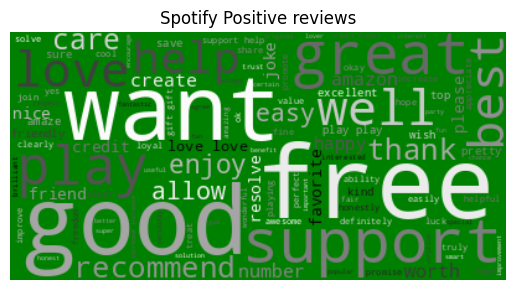

In [ ]:
pos_words = []
neg_words = []

comp_data = df[df['Apps'] == 'Spotify']

SentimentAnalysis(comp_data)

wc = WordCloud(background_color = 'green', colormap='gist_gray')

# Generate word cloud
wordcloud = wc.generate(' '.join(pos_words))

# Visualize the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Spotify Positive reviews')
plt.axis("off")
plt.show()


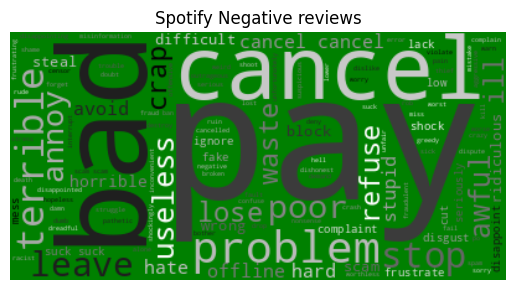

In [ ]:
pos_words = []
neg_words = []

comp_data = df[df['Apps'] == 'Spotify']

SentimentAnalysis(comp_data)

wc = WordCloud(background_color = 'green', colormap='gist_gray')

# Generate word cloud
wordcloud = wc.generate(' '.join(neg_words))

# Visualize the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Spotify Negative reviews')
plt.axis("off")
plt.show()

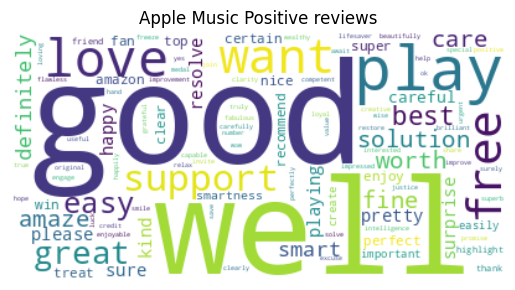

In [ ]:
pos_words = []
neg_words = []

comp_data = df[df['Apps'] == 'Apple music']

SentimentAnalysis(comp_data)

wc = WordCloud(background_color = 'white')

# Generate word cloud
wordcloud = wc.generate(' '.join(pos_words))

# Visualize the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Apple Music Positive reviews')
plt.axis("off")
plt.show()


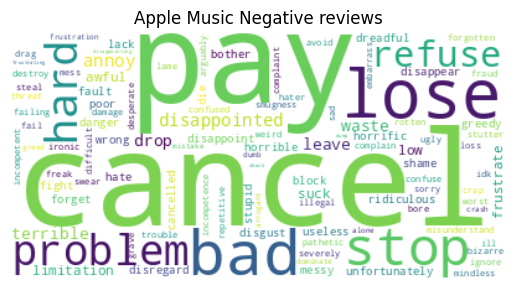

In [ ]:
pos_words = []
neg_words = []

comp_data = df[df['Apps'] == 'Apple music']

SentimentAnalysis(comp_data)

wc = WordCloud(background_color = 'white')

# Generate word cloud
wordcloud = wc.generate(' '.join(neg_words))

# Visualize the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Apple Music Negative reviews')
plt.axis("off")
plt.show()
